## 1.Installation of the necessary libraries

In [1]:
pip install opencv-python albumentations

  Using cached albumentations-1.4.11-py3-none-any.whl.metadata (39 kB)
  Using cached scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata (12 kB)
  Using cached pydantic-2.8.2-py3-none-any.whl.metadata (125 kB)
  Using cached albucore-0.0.12-py3-none-any.whl.metadata (3.1 kB)
  Using cached eval_type_backport-0.2.0-py3-none-any.whl.metadata (2.2 kB)
  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
Using cached albumentations-1.4.11-py3-none-any.whl (165 kB)
Using cached albucore-0.0.12-py3-none-any.whl (8.4 kB)
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Using cached pydantic-2.8.2-py3-none-any.whl (423 kB)
Using cached scikit_learn-1.5.1-cp311-cp311-win_amd64.whl (11.0 MB)
Using cached eval_type_backport-0.2.0-py3-none-any.whl (5.9 kB)
Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
  Attempting uninstall: scikit-learn
    Fou

  You can safely remove it manually.


## 2. Import required libraries and import paths

In [1]:
import os
import cv2
import albumentations as A

In [10]:
# Define paths
train_images_dir = 'C:/Users/Lenovo/Downloads/SegSperm/SegSperm/train/images'
train_masks_dir = 'C:/Users/Lenovo/Downloads/SegSperm/SegSperm/train/GT1_full'
augmented_images_dir = 'C:/Users/Lenovo/Downloads/SegSperm/AugmentedSegSperm/ground_truth'
augmented_masks_dir = 'C:/Users/Lenovo/Downloads/SegSperm/AugmentedSegSperm/binary_mask'


## 3. Applying the augmentations

In [4]:
# Define augmentations
rotations = [45, 90]
flips = ['horizontal', 'vertical']

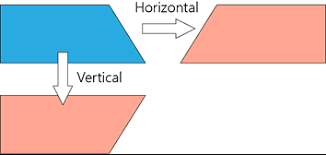

In [5]:
# Function to apply augmentations and save images
def augment_and_save(image_path, mask_path, image_name, suffix):
    # Read the image and the corresponding mask
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Apply rotation
    if suffix.startswith('rot'):
        angle = int(suffix.split('_')[1])
        transform = A.Rotate(limit=(angle, angle), p=1.0)
        augmented = transform(image=image, mask=mask)
        augmented_image = augmented['image']
        augmented_mask = augmented['mask']
    # Apply flip
    elif suffix == 'hflip':
        transform = A.HorizontalFlip(p=1.0)
        augmented = transform(image=image, mask=mask)
        augmented_image = augmented['image']
        augmented_mask = augmented['mask']
    elif suffix == 'vflip':
        transform = A.VerticalFlip(p=1.0)
        augmented = transform(image=image, mask=mask)
        augmented_image = augmented['image']
        augmented_mask = augmented['mask']
    
    # Save augmented images and masks
    cv2.imwrite(os.path.join(augmented_images_dir, f"{image_name}_{suffix}.png"), augmented_image)
    cv2.imwrite(os.path.join(augmented_masks_dir, f"{image_name}_{suffix}.png"), augmented_mask)



In [8]:
# Get list of images 
image_files = os.listdir(train_images_dir)

In [11]:
# Process each image and its corresponding mask
for image_file in image_files:
    image_name, _ = os.path.splitext(image_file)
    image_path = os.path.join(train_images_dir, image_file)
    mask_path = os.path.join(train_masks_dir, image_file)

    # Check if the corresponding mask exists
    if os.path.exists(mask_path):
        # Apply rotations
        for angle in rotations:
            augment_and_save(image_path, mask_path, image_name, f"rot_{angle}")

        # Apply flips
        for flip in flips:
            augment_and_save(image_path, mask_path, image_name, f"{flip[0]}flip")

print("Augmentation completed and images saved.")

Augmentation completed and images saved.
